서치한 부분은 걍 무시하세요 $\sim\sim\sim\sim$ 디폴트가 제일 좋아요$\sim\sim\sim\sim$ 미치겠어요$\sim\sim\sim\sim$

# XGBoost

# default parameter

max_depth: int = 3,
learning_rate: float = 0.1,
n_estimators: int = 100,
verbosity: int = 1,
silent: Any | None = None,
objective: str = "reg:linear",
booster: str = 'gbtree',
n_jobs: int = 1,
nthread: Any | None = None,
gamma: int = 0,
min_child_weight: int = 1,
max_delta_step: int = 0,
subsample: int = 1,
colsample_bytree: int = 1,
colsample_bylevel: int = 1,
colsample_bynode: int = 1,
reg_alpha: int = 0,
reg_lambda: int = 1,
scale_pos_weight: int = 1,
base_score: float = 0.5,
random_state: int = 0,
seed: Any | None = None,
missing: Any | None = None,
importance_type: str = "gain",
** kwargs: Any) -> None
Implementation of the scikit-learn API for XGBoost regression.

** kwargs : dict, optional
    Keyword arguments for XGBoost Booster object.  

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv("final_dataset4.csv")
data.head()

,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,NaN,NaN
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,NaN,NaN
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,NaN,NaN
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,NaN,NaN
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,NaN,NaN


In [ ]:
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000
#  지정된 행에 0을 넣기
data.loc[0:1416, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data.loc[5832:10200, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data.loc[14617:17544, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data

,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.100000,87.000000,840.911874,78.393571,9.645630,9.775290,4.442480,0.0,0.0
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.800000,87.000000,856.601990,74.705911,9.683795,9.773381,4.471164,0.0,0.0
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.500000,87.000000,871.298626,75.947870,9.664150,9.740255,4.508429,0.0,0.0
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.100000,87.000000,878.309889,78.281749,9.635497,9.729305,4.519635,0.0,0.0
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.800000,88.000000,893.520363,79.009383,9.601495,9.681717,4.558723,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2020-12-31 19:00:00,-2.4,55.0,1.2,16.163760,79.703424,910.789500,268.810624,12.075710,9.608635,3.520950,0.0,0.0
17540,2020-12-31 20:00:00,-3.2,61.0,0.7,15.238261,82.629882,934.961426,269.543936,12.039716,9.558942,3.549016,0.0,0.0
17541,2020-12-31 21:00:00,-3.7,67.0,0.8,14.456612,85.403780,955.767013,268.562786,12.033155,9.526215,3.566564,0.0,0.0
17542,2020-12-31 22:00:00,-4.0,68.0,1.5,14.222446,85.976279,961.665856,264.968406,12.083256,9.547396,3.559739,0.0,0.0


In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT',
            'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# 멀티아웃풋 회귀 모델 설정 및 훈련
model = MultiOutputRegressor(XGBRegressor())
model.fit(X_train, y_train)

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# 예측 및 결측값 채우기
predictions = model.predict(X_test)
data.loc[X_test.index, targets] = predictions

# 모델 성능 평가 (RMSE 계산)
y_pred = model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')

data.head()


SHPMN_QTY RMSE: 40.98956755926951
SHPMN_AMT RMSE: 155.44730890963746


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,0.0,0.0
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,0.0,0.0
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,0.0,0.0
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,0.0,0.0
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt

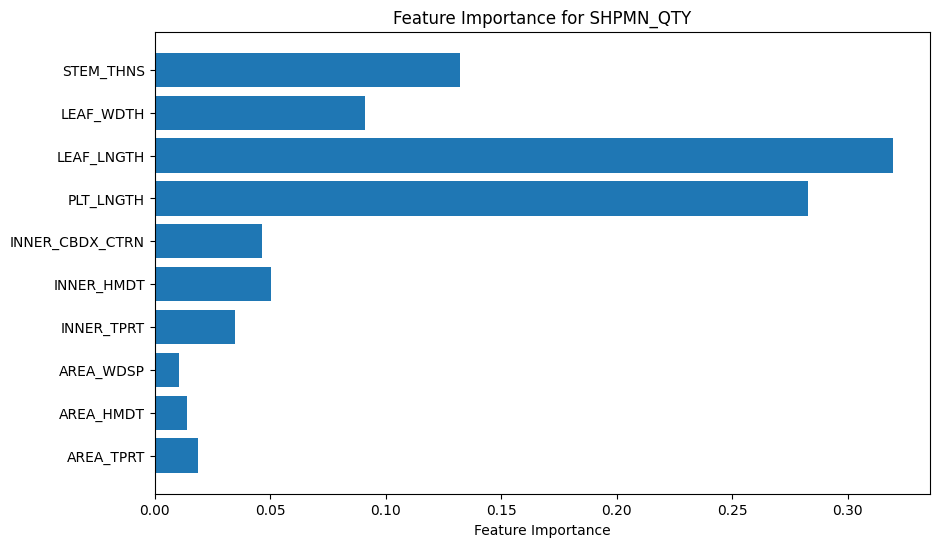


Feature importance values for SHPMN_QTY:
AREA_TPRT: 0.0189
AREA_HMDT: 0.0140
AREA_WDSP: 0.0104
INNER_TPRT: 0.0348
INNER_HMDT: 0.0502
INNER_CBDX_CTRN: 0.0464
PLT_LNGTH: 0.2826
LEAF_LNGTH: 0.3194
LEAF_WDTH: 0.0911
STEM_THNS: 0.1323


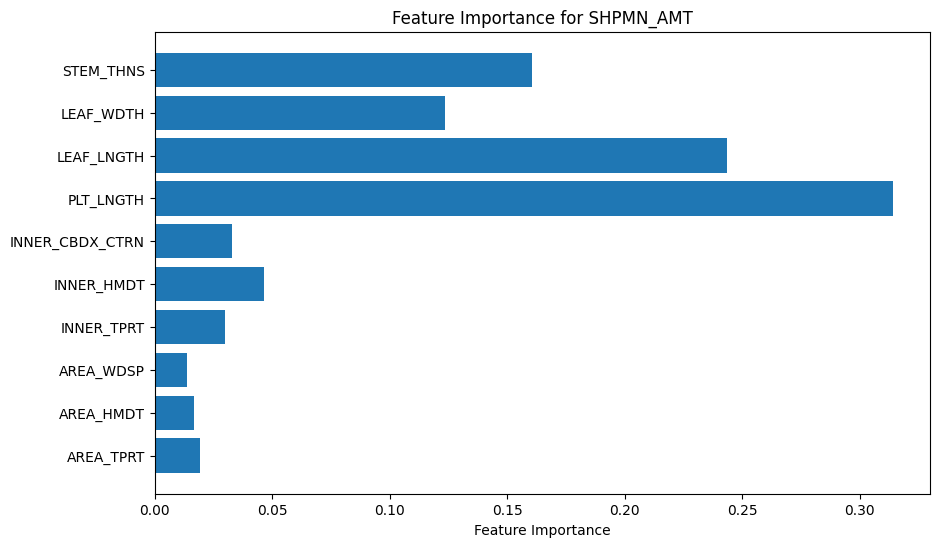


Feature importance values for SHPMN_AMT:
AREA_TPRT: 0.0194
AREA_HMDT: 0.0166
AREA_WDSP: 0.0138
INNER_TPRT: 0.0297
INNER_HMDT: 0.0466
INNER_CBDX_CTRN: 0.0327
PLT_LNGTH: 0.3140
LEAF_LNGTH: 0.2435
LEAF_WDTH: 0.1233
STEM_THNS: 0.1604

Feature importance values for all targets:
                 SHPMN_QTY  SHPMN_AMT
AREA_TPRT         0.018871   0.019370
AREA_HMDT         0.013965   0.016649
AREA_WDSP         0.010371   0.013806
INNER_TPRT        0.034821   0.029744
INNER_HMDT        0.050181   0.046566
INNER_CBDX_CTRN   0.046371   0.032687
PLT_LNGTH         0.282568   0.314038
LEAF_LNGTH        0.319440   0.243464
LEAF_WDTH         0.091096   0.123321
STEM_THNS         0.132316   0.160356


In [ ]:
# 특성 중요도 시각화
# 특성 중요도 값과 함께 시각화
feature_importance_values = {}

for i, target in enumerate(targets):
    importance = model.estimators_[i].feature_importances_
    feature_importance_values[target] = importance

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance, align='center')
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance for {target}')
    plt.show()

    # 중요도 값을 표 형태로 출력
    print(f"\nFeature importance values for {target}:")
    for feat, imp in zip(features, importance):
        print(f"{feat}: {imp:.4f}")

# 특성 중요도를 DataFrame으로 정리하여 표시
feature_importance_df = pd.DataFrame(feature_importance_values, index=features)
print("\nFeature importance values for all targets:")
print(feature_importance_df)

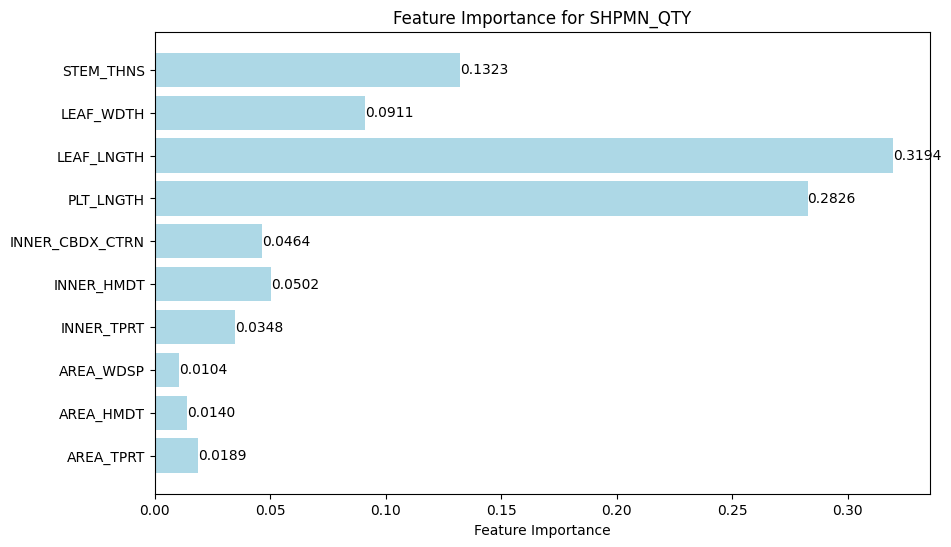


Feature importance values for SHPMN_QTY:
AREA_TPRT: 0.0189
AREA_HMDT: 0.0140
AREA_WDSP: 0.0104
INNER_TPRT: 0.0348
INNER_HMDT: 0.0502
INNER_CBDX_CTRN: 0.0464
PLT_LNGTH: 0.2826
LEAF_LNGTH: 0.3194
LEAF_WDTH: 0.0911
STEM_THNS: 0.1323


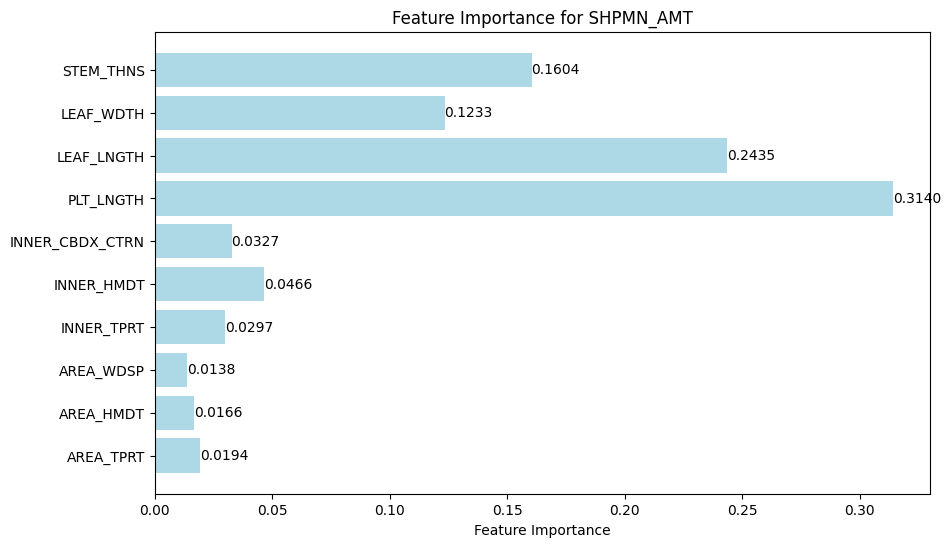


Feature importance values for SHPMN_AMT:
AREA_TPRT: 0.0194
AREA_HMDT: 0.0166
AREA_WDSP: 0.0138
INNER_TPRT: 0.0297
INNER_HMDT: 0.0466
INNER_CBDX_CTRN: 0.0327
PLT_LNGTH: 0.3140
LEAF_LNGTH: 0.2435
LEAF_WDTH: 0.1233
STEM_THNS: 0.1604

Feature importance values for all targets:
                 SHPMN_QTY  SHPMN_AMT
AREA_TPRT         0.018871   0.019370
AREA_HMDT         0.013965   0.016649
AREA_WDSP         0.010371   0.013806
INNER_TPRT        0.034821   0.029744
INNER_HMDT        0.050181   0.046566
INNER_CBDX_CTRN   0.046371   0.032687
PLT_LNGTH         0.282568   0.314038
LEAF_LNGTH        0.319440   0.243464
LEAF_WDTH         0.091096   0.123321
STEM_THNS         0.132316   0.160356


In [ ]:
# 특성 중요도 값과 함께 시각화
feature_importance_values = {}

for i, target in enumerate(targets):
    importance = model.estimators_[i].feature_importances_
    feature_importance_values[target] = importance

    # 시각화
    plt.figure(figsize=(10, 6))
    bars = plt.barh(features, importance, color="lightblue", align='center')
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance for {target}')

    # 막대 끝에 정확한 값 표시
    for bar, imp in zip(bars, importance):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{imp:.4f}',
                 va='center', ha='left', fontsize=10, color='black')

    plt.show()

    # 중요도 값을 표 형태로 출력
    print(f"\nFeature importance values for {target}:")
    for feat, imp in zip(features, importance):
        print(f"{feat}: {imp:.4f}")

# 특성 중요도를 DataFrame으로 정리하여 표시
feature_importance_df = pd.DataFrame(feature_importance_values, index=features)
print("\nFeature importance values for all targets:")
print(feature_importance_df)

In [ ]:
data['SHPMN_AMT'] = data['SHPMN_AMT']*1000
data.head()

,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,0.0,0.0
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,0.0,0.0
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,0.0,0.0
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,0.0,0.0
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,0.0,0.0


출하량

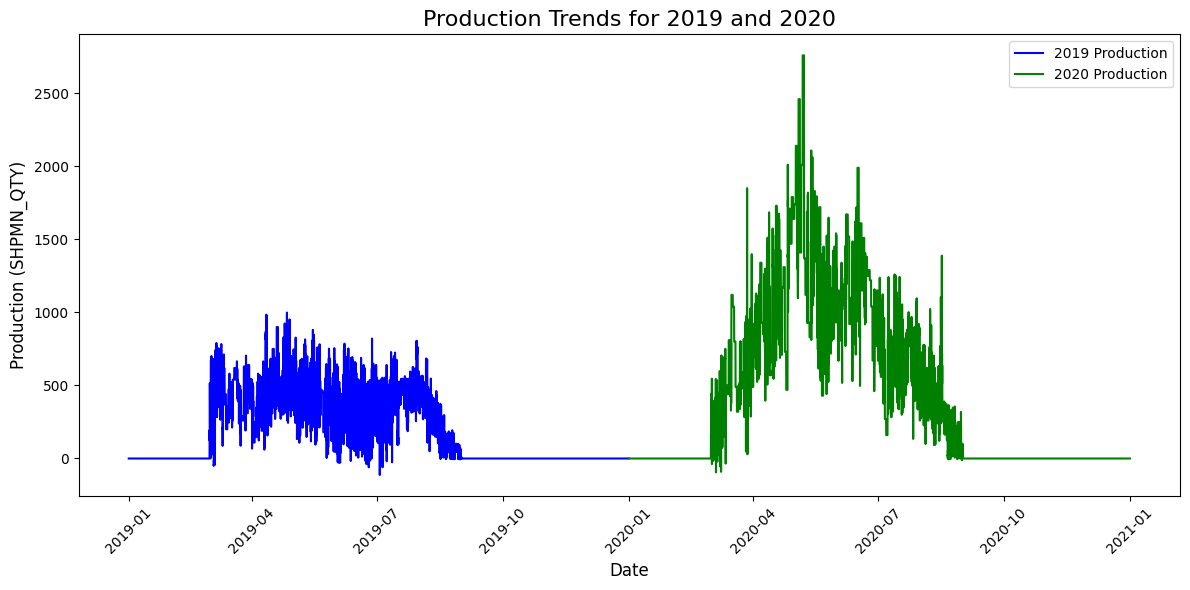

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. MSRM_DT 컬럼을 datetime 타입으로 변환 (필요 시)
data['MSRM_DT'] = pd.to_datetime(data['MSRM_DT'])

# 2. 2019년, 2020년 데이터 필터링
df_2019 = data[data['MSRM_DT'].dt.year == 2019]
df_2020 = data[data['MSRM_DT'].dt.year == 2020]

# 3. 시각화 설정
plt.figure(figsize=(12, 6))

# 4. 2019년 생산량 라인 그래프
plt.plot(df_2019['MSRM_DT'], df_2019['SHPMN_QTY'], label='2019 Production', color='blue')

# 5. 2020년 생산량 라인 그래프
plt.plot(df_2020['MSRM_DT'], df_2020['SHPMN_QTY'], label='2020 Production', color='green')

# 6. 그래프 레이블 및 제목 설정
plt.xlabel('Date', fontsize=12)
plt.ylabel('Production (SHPMN_QTY)', fontsize=12)
plt.title('Production Trends for 2019 and 2020', fontsize=16)
plt.legend()  # 범례 표시

# 7. x축 날짜 포맷 조정 (자동 조정)
plt.xticks(rotation=45)
plt.tight_layout()  # 레이아웃 자동 조정

# 8. 그래프 출력
plt.show()


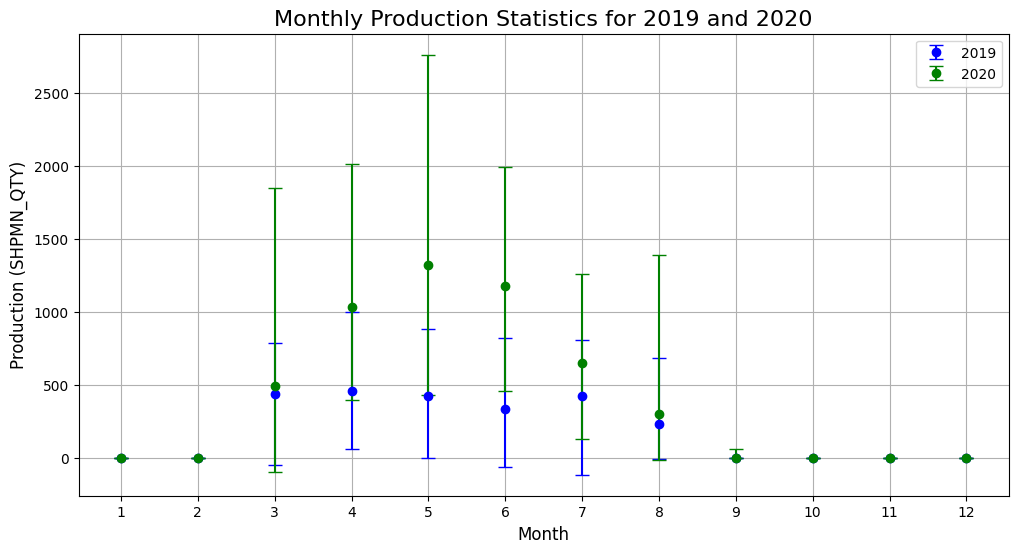

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert MSRM_DT to datetime (if necessary)
data['MSRM_DT'] = pd.to_datetime(data['MSRM_DT'])

# 2. Add 'year' and 'month' columns
data['year'] = data['MSRM_DT'].dt.year
data['month'] = data['MSRM_DT'].dt.month

# 3. Filter data for 2019 and 2020
df_2019 = data[data['year'] == 2019]
df_2020 = data[data['year'] == 2020]

# 4. Calculate monthly statistics: min, max, mean
stats_2019 = df_2019.groupby('month')['SHPMN_QTY'].agg(['min', 'max', 'mean']).reset_index()
stats_2020 = df_2020.groupby('month')['SHPMN_QTY'].agg(['min', 'max', 'mean']).reset_index()

# 5. Plotting the intervals and mean values
plt.figure(figsize=(12, 6))

# 2019 plot: min-max range with mean
plt.errorbar(stats_2019['month'], stats_2019['mean'],
             yerr=[stats_2019['mean'] - stats_2019['min'], stats_2019['max'] - stats_2019['mean']],
             fmt='o', capsize=5, label='2019', color='blue')

# 2020 plot: min-max range with mean
plt.errorbar(stats_2020['month'], stats_2020['mean'],
             yerr=[stats_2020['mean'] - stats_2020['min'], stats_2020['max'] - stats_2020['mean']],
             fmt='o', capsize=5, label='2020', color='green')

# Plot labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Production (SHPMN_QTY)', fontsize=12)
plt.title('Monthly Production Statistics for 2019 and 2020', fontsize=16)
plt.legend()

# Adjust x-ticks for better readability
plt.xticks(stats_2019['month'])

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# 1. MSRM_DT 컬럼을 datetime 타입으로 변환 (필요 시)
data['MSRM_DT'] = pd.to_datetime(data['MSRM_DT'])

# 2. 연도와 월 컬럼 추가
data['year'] = data['MSRM_DT'].dt.year
data['month'] = data['MSRM_DT'].dt.month

# 3. 2019년, 2020년 데이터 필터링
df_2019 = data[data['year'] == 2019]
df_2020 = data[data['year'] == 2020]

# 4. 월별로 min, max, mean 등의 통계량 계산
stats_2019 = df_2019.groupby('month')['SHPMN_QTY'].describe()[['min', 'max', 'mean']]
stats_2020 = df_2020.groupby('month')['SHPMN_QTY'].describe()[['min', 'max', 'mean']]

# 5. 결과 출력
print("2019년 월별 생산량 통계:\n", stats_2019)
print("\n2020년 월별 생산량 통계:\n", stats_2020)


2019년 월별 생산량 통계:
               min         max        mean
month                                    
1        0.000000    0.000000    0.000000
2        0.000000    0.000000    0.000000
3      -48.619171  790.565613  438.729155
4       60.506554  999.345154  457.461219
5        3.616064  880.406799  427.766754
6      -60.245071  820.984131  335.836369
7     -112.999176  805.493347  423.899223
8       -5.306962  685.076233  232.369717
9        0.000000    0.000000    0.000000
10       0.000000    0.000000    0.000000
11       0.000000    0.000000    0.000000
12       0.000000    0.000000    0.000000

2020년 월별 생산량 통계:
               min          max         mean
month                                      
1        0.000000     0.000000     0.000000
2        0.000000     0.000000     0.000000
3      -94.828957  1850.748169   496.017543
4      395.756561  2011.442993  1031.942682
5      430.000000  2760.000000  1323.606312
6      460.699097  1990.000000  1180.150602
7      134.113098  1260

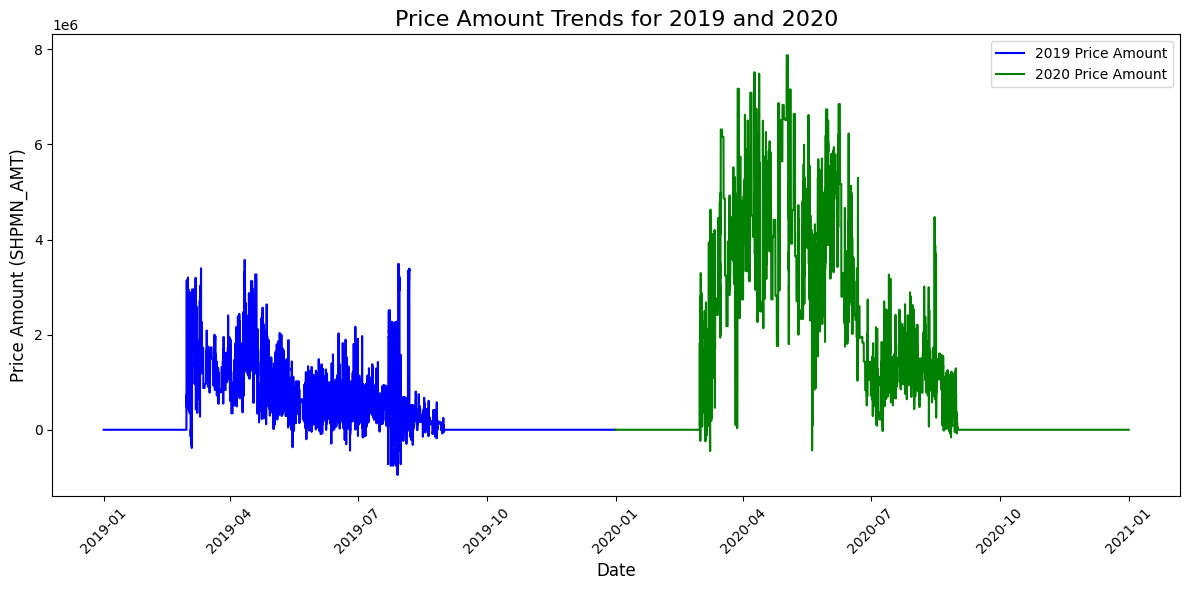

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. MSRM_DT 컬럼을 datetime 타입으로 변환 (필요 시)
data['MSRM_DT'] = pd.to_datetime(data['MSRM_DT'])

# 2. 2019년, 2020년 데이터 필터링
df_2019 = data[data['MSRM_DT'].dt.year == 2019]
df_2020 = data[data['MSRM_DT'].dt.year == 2020]

# 3. 시각화 설정
plt.figure(figsize=(12, 6))

# 4. 2019년 생산량 라인 그래프
plt.plot(df_2019['MSRM_DT'], df_2019['SHPMN_AMT'], label='2019 Price Amount', color='blue')

# 5. 2020년 생산량 라인 그래프
plt.plot(df_2020['MSRM_DT'], df_2020['SHPMN_AMT'], label='2020 Price Amount', color='green')

# 6. 그래프 레이블 및 제목 설정
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price Amount (SHPMN_AMT)', fontsize=12)
plt.title('Price Amount Trends for 2019 and 2020', fontsize=16)
plt.legend()  # 범례 표시

# 7. x축 날짜 포맷 조정 (자동 조정)
plt.xticks(rotation=45)
plt.tight_layout()  # 레이아웃 자동 조정

# 8. 그래프 출력
plt.show()

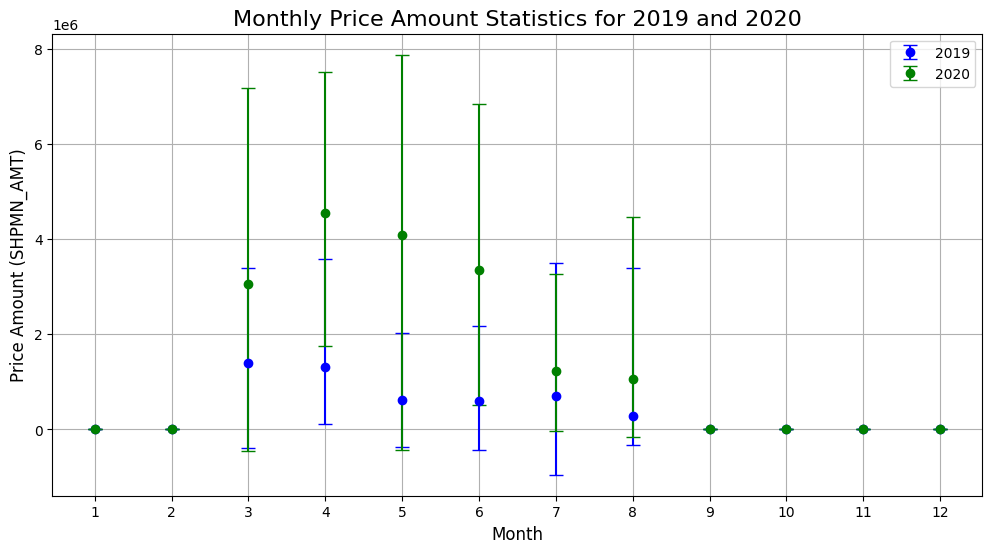

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert MSRM_DT to datetime (if necessary)
data['MSRM_DT'] = pd.to_datetime(data['MSRM_DT'])

# 2. Add 'year' and 'month' columns
data['year'] = data['MSRM_DT'].dt.year
data['month'] = data['MSRM_DT'].dt.month

# 3. Filter data for 2019 and 2020
df_2019 = data[data['year'] == 2019]
df_2020 = data[data['year'] == 2020]

# 4. Calculate monthly statistics: min, max, mean
stats_2019 = df_2019.groupby('month')['SHPMN_AMT'].agg(['min', 'max', 'mean']).reset_index()
stats_2020 = df_2020.groupby('month')['SHPMN_AMT'].agg(['min', 'max', 'mean']).reset_index()

# 5. Plotting the intervals and mean values
plt.figure(figsize=(12, 6))

# 2019 plot: min-max range with mean
plt.errorbar(stats_2019['month'], stats_2019['mean'],
             yerr=[stats_2019['mean'] - stats_2019['min'], stats_2019['max'] - stats_2019['mean']],
             fmt='o', capsize=5, label='2019', color='blue')

# 2020 plot: min-max range with mean
plt.errorbar(stats_2020['month'], stats_2020['mean'],
             yerr=[stats_2020['mean'] - stats_2020['min'], stats_2020['max'] - stats_2020['mean']],
             fmt='o', capsize=5, label='2020', color='green')

# Plot labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price Amount (SHPMN_AMT)', fontsize=12)
plt.title('Monthly Price Amount Statistics for 2019 and 2020', fontsize=16)
plt.legend()

# Adjust x-ticks for better readability
plt.xticks(stats_2019['month'])

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# 1. MSRM_DT 컬럼을 datetime 타입으로 변환 (필요 시)
data['MSRM_DT'] = pd.to_datetime(data['MSRM_DT'])

# 2. 연도와 월 컬럼 추가
data['year'] = data['MSRM_DT'].dt.year
data['month'] = data['MSRM_DT'].dt.month

# 3. 2019년, 2020년 데이터 필터링
df_2019 = data[data['year'] == 2019]
df_2020 = data[data['year'] == 2020]

# 4. 월별로 min, max, mean 등의 통계량 계산
stats_2019 = df_2019.groupby('month')['SHPMN_AMT'].describe()[['min', 'max', 'mean']]
stats_2020 = df_2020.groupby('month')['SHPMN_AMT'].describe()[['min', 'max', 'mean']]

# 5. 결과 출력
print("2019년 월별 출하금액 통계:\n", stats_2019)
print("\n2020년 월별 출하금액 통계:\n", stats_2020)


2019년 월별 출하금액 통계:
                  min           max          mean
month                                           
1           0.000000  0.000000e+00  0.000000e+00
2           0.000000  0.000000e+00  0.000000e+00
3     -382608.276367  3.396042e+06  1.389941e+06
4      118811.363220  3.573511e+06  1.322474e+06
5     -367010.864258  2.034937e+06  6.287059e+05
6     -438683.105469  2.166595e+06  5.903996e+05
7     -951354.614258  3.489409e+06  6.984187e+05
8     -318692.260742  3.389257e+06  2.904725e+05
9           0.000000  0.000000e+00  0.000000e+00
10          0.000000  0.000000e+00  0.000000e+00
11          0.000000  0.000000e+00  0.000000e+00
12          0.000000  0.000000e+00  0.000000e+00

2020년 월별 출하금액 통계:
                 min           max          mean
month                                          
1      0.000000e+00  0.000000e+00  0.000000e+00
2      0.000000e+00  0.000000e+00  0.000000e+00
3     -4.487422e+05  7.170000e+06  3.059482e+06
4      1.762000e+06  7.519540e+06  

## GridSearch

In [ ]:
data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error


# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# XGBoost 하이퍼파라미터 그리드 정의
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 5, 7],
    'estimator__subsample': [0.7, 0.8, 1.0]
}

# MultiOutputRegressor를 사용하여 다중 출력 예측 설정
model = MultiOutputRegressor(XGBRegressor())

# GridSearchCV 설정
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 파라미터와 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# 최적 모델로 예측 수행
best_model = grid_search.best_estimator_

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# 예측 및 결측값 채우기
predictions = best_model.predict(X_test)
data.loc[X_test.index, targets] = predictions


# 최적 모델 성능 평가 (RMSE 계산)
y_pred = best_model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')


디폴트보다 안 좋네

## RandomizedSearchCV

In [ ]:
data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# RandomizedSearchCV를 위한 파라미터 범위 설정
param_distributions = {
    'estimator__n_estimators': [50, 100, 200, 300, 400],
    'estimator__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'estimator__max_depth': [3, 5, 7, 10],
    'estimator__subsample': [0.6, 0.8, 1.0],
    'estimator__colsample_bytree': [0.6, 0.8, 1.0],
    'estimator__gamma': [0, 0.1, 0.2],
}

# RandomizedSearchCV 설정
model = MultiOutputRegressor(XGBRegressor())
random_search = RandomizedSearchCV(model, param_distributions, n_iter=20, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)

# RandomizedSearchCV로 최적 파라미터 찾기
random_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

# 최적 파라미터로 모델 재학습
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# 예측 및 결측값 채우기
predictions = best_model.predict(X_test)
data.loc[X_test.index, targets] = predictions

# 모델 성능 평가 (RMSE 계산)
y_pred = best_model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')

data.head()


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'estimator__subsample': 0.6, 'estimator__n_estimators': 50, 'estimator__max_depth': 5, 'estimator__learning_rate': 0.01, 'estimator__gamma': 0.2, 'estimator__colsample_bytree': 0.8}
Best Score: 2708132.1531267725
SHPMN_QTY RMSE: 430.91002322584694
SHPMN_AMT RMSE: 1583.504637725088


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,944.757019,3237.489502
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,944.757019,3256.363525
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,960.739746,3239.205078
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,960.739746,3233.609619
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,965.224915,3276.207764


더 촘촘하게 해보겠음

In [ ]:
data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# 더욱 촘촘한 파라미터 범위 설정
param_distributions = {
    'estimator__n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'estimator__learning_rate': np.linspace(0.01, 0.1, 10),   # 더 좁은 간격
    'estimator__max_depth': [3, 4, 5, 6, 7],
    'estimator__subsample': np.linspace(0.75, 1.0, 6),       # 더 좁은 간격
    'estimator__colsample_bytree': np.linspace(0.75, 1.0, 6), # 더 좁은 간격
    'estimator__gamma': [0, 0.01, 0.05, 0.1, 0.2],
    'estimator__min_child_weight': [1, 2, 3, 4, 5]
}

# MultiOutputRegressor 및 RandomizedSearchCV 설정
model = MultiOutputRegressor(XGBRegressor())
random_search = RandomizedSearchCV(model, param_distributions, n_iter=100, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)

# RandomizedSearchCV로 최적 파라미터 찾기
random_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

# 최적 파라미터로 모델 재학습
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# 예측 및 결측값 채우기
predictions = best_model.predict(X_test)
data.loc[X_test.index, targets] = predictions

# 모델 성능 평가 (RMSE 계산)
y_pred = best_model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')

data.head()


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'estimator__subsample': 0.75, 'estimator__n_estimators': 100, 'estimator__min_child_weight': 3, 'estimator__max_depth': 5, 'estimator__learning_rate': 0.01, 'estimator__gamma': 0, 'estimator__colsample_bytree': 0.8}
Best Score: 2759143.3738679187
SHPMN_QTY RMSE: 366.6617100627149
SHPMN_AMT RMSE: 1351.8841887353133


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,998.404785,3401.476074
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,996.354248,3427.050781
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,1031.441650,3422.894043
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,1031.441650,3410.625244
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,1049.649536,3402.534180


해도 안 되네

그러면 그냥 디폴트 파라미터라고 알려주는 대로 지정해서 돌려보겠음

In [ ]:
data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000

In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error


# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# 문제가 되는 파라미터를 제거한 XGBRegressor 기본 파라미터 설정
xgb_model = MultiOutputRegressor(XGBRegressor(
    objective='reg:squarederror',  # 기본 회귀 손실 함수
    n_estimators=100,              # 기본 트리 개수
    learning_rate=0.1,             # 학습률
    max_depth=6,                   # 트리 깊이
    min_child_weight=1,            # 자식 노드의 최소 가중치 합
    gamma=0,                       # 분할 시 최소 손실 감소량
    subsample=1,                   # 각 트리에 사용할 샘플 비율
    colsample_bytree=1,            # 각 트리에서 사용할 특성 비율
    colsample_bylevel=1,           # 각 레벨에서 특성 샘플링 비율
    colsample_bynode=1,            # 각 노드에서 특성 샘플링 비율
    reg_alpha=0,                   # L1 정규화
    reg_lambda=1,                  # L2 정규화
    scale_pos_weight=1,            # 클래스 불균형 조정
    base_score=0.5,                # 초기 예측값
    random_state=0,                # 난수 시드
    booster='gbtree',              # 부스팅 모델 (gbtree)
    tree_method='auto',            # 트리 생성 방식
    grow_policy='depthwise',       # 트리 성장 정책
    max_bin=256,                   # 히스토그램 빈 수
    verbosity=1                    # 로그 레벨 (기본값)
))
xgb_model.fit(X_train, y_train)

# 예측 및 결측값 채우기
predictions = xgb_model.predict(X_test)
data.loc[X_test.index, targets] = predictions

# 모델 성능 평가 (RMSE 계산)
y_pred = xgb_model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')

data.head()


SHPMN_QTY RMSE: 134.62828689444294
SHPMN_AMT RMSE: 523.1556295631656


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,1094.444580,4222.953125
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,1095.017700,4193.834473
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,922.452698,3595.056641
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,926.459045,3601.496826
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,944.692993,3775.315430


디폴트 파라미터 좀 제발 알고 싶다

In [ ]:
# 데이터 불러오기
data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000

# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# 기본 XGBRegressor를 초기화하고 학습하여 실제 내부 설정 확인
temp_model = MultiOutputRegressor(XGBRegressor())
temp_model.fit(X_train, y_train)

# 기본 설정으로 학습한 모델의 실제 파라미터 출력
print("True Default Parameters:", temp_model.estimators_[0].get_params())

# 예측 및 성능 평가
predictions = temp_model.predict(X_test)
data.loc[X_test.index, targets] = predictions

# 모델 성능 평가 (RMSE 계산)
y_pred = temp_model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')

True Default Parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
SHPMN_QTY RMSE: 49.05784546374893
SHPMN_AMT RMSE: 178.50525446381013


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# LightGBM

In [ ]:
data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000
#  지정된 행에 0을 넣기
data.loc[0:1416, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data.loc[5832:10200, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data.loc[14617:17544, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data

,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.100000,87.000000,840.911874,78.393571,9.645630,9.775290,4.442480,0.0,0.0
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.800000,87.000000,856.601990,74.705911,9.683795,9.773381,4.471164,0.0,0.0
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.500000,87.000000,871.298626,75.947870,9.664150,9.740255,4.508429,0.0,0.0
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.100000,87.000000,878.309889,78.281749,9.635497,9.729305,4.519635,0.0,0.0
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.800000,88.000000,893.520363,79.009383,9.601495,9.681717,4.558723,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2020-12-31 19:00:00,-2.4,55.0,1.2,16.163760,79.703424,910.789500,268.810624,12.075710,9.608635,3.520950,0.0,0.0
17540,2020-12-31 20:00:00,-3.2,61.0,0.7,15.238261,82.629882,934.961426,269.543936,12.039716,9.558942,3.549016,0.0,0.0
17541,2020-12-31 21:00:00,-3.7,67.0,0.8,14.456612,85.403780,955.767013,268.562786,12.033155,9.526215,3.566564,0.0,0.0
17542,2020-12-31 22:00:00,-4.0,68.0,1.5,14.222446,85.976279,961.665856,264.968406,12.083256,9.547396,3.559739,0.0,0.0


In [ ]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error


# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# 멀티아웃풋 회귀 모델 설정 및 훈련
model = MultiOutputRegressor(LGBMRegressor())
model.fit(X_train, y_train)

# 예측 및 결측값 채우기
predictions = model.predict(X_test)
data.loc[X_test.index, targets] = predictions

# 모델 성능 평가 (RMSE 계산)
y_pred = model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2185
[LightGBM] [Info] Number of data points in the train set: 11353, number of used features: 10
[LightGBM] [Info] Start training from score 202.772835
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2185
[LightGBM] [Info] Number of data points in the train set: 11353, number of used features: 10
[LightGBM] [Info] Start training from score 678.024839
SHPMN_QTY RMSE: 85.28517714654869
SHPMN_AMT RMSE: 320.4463254190307


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
data.head()

,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,0.0,0.0
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,0.0,0.0
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,0.0,0.0
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,0.0,0.0
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,0.0,0.0


## RandomizedSearchCV

In [ ]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000

# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# RandomizedSearchCV를 위한 파라미터 범위 설정
param_distributions = {
    'estimator__n_estimators': [100, 200, 300, 400, 500],
    'estimator__learning_rate': np.linspace(0.01, 0.1, 10),  # 학습률 범위
    'estimator__max_depth': [4, 5, 6, 7, 8],                 # 트리 깊이
    'estimator__num_leaves': [20, 30, 40, 50, 60],           # 리프 노드 수
    'estimator__subsample': np.linspace(0.7, 1.0, 4),        # 샘플링 비율
    'estimator__colsample_bytree': np.linspace(0.7, 1.0, 4), # 트리별 특성 샘플링 비율
    'estimator__min_child_samples': [5, 10, 15, 20]          # 리프 노드가 필요로 하는 최소 샘플 수
}

# MultiOutputRegressor 및 RandomizedSearchCV 설정
model = MultiOutputRegressor(LGBMRegressor())
random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)

# RandomizedSearchCV로 최적 파라미터 찾기
random_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

# 최적 파라미터로 모델 재학습
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# 예측 및 결측값 채우기
predictions = best_model.predict(X_test)
data.loc[X_test.index, targets] = predictions

# 모델 성능 평가 (RMSE 계산)
y_pred = best_model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')

data.head()


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2160
[LightGBM] [Info] Number of data points in the train set: 2640, number of used features: 10
[LightGBM] [Info] Start training from score 872.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2160
[LightGBM] [Info] Number of data points in the train set: 2640, number of used features: 10
[LightGBM] [Info] Start training from score 2915.763636
Best Parameters: {'estimator__subsample': 0.9, 'estimator__num_leaves': 30, 'estimator__n_estimators': 100, 'estimator__min_child_samples': 5, 'estimator__max_depth': 8, 'estimator__learn

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,1037.770601,3297.328687
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,1037.770601,3323.921564
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,1031.862166,3325.986058
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,1031.862166,3326.220027
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,1131.495546,3314.441016


너도 그러니? 왜 서치만 하면 거지같아지니

# CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv("final_dataset4.csv")
data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000
#  지정된 행에 0을 넣기
data.loc[0:1416, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data.loc[5832:10200, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data.loc[14617:17544, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data

,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.100000,87.000000,840.911874,78.393571,9.645630,9.775290,4.442480,0.0,0.0
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.800000,87.000000,856.601990,74.705911,9.683795,9.773381,4.471164,0.0,0.0
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.500000,87.000000,871.298626,75.947870,9.664150,9.740255,4.508429,0.0,0.0
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.100000,87.000000,878.309889,78.281749,9.635497,9.729305,4.519635,0.0,0.0
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.800000,88.000000,893.520363,79.009383,9.601495,9.681717,4.558723,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2020-12-31 19:00:00,-2.4,55.0,1.2,16.163760,79.703424,910.789500,268.810624,12.075710,9.608635,3.520950,0.0,0.0
17540,2020-12-31 20:00:00,-3.2,61.0,0.7,15.238261,82.629882,934.961426,269.543936,12.039716,9.558942,3.549016,0.0,0.0
17541,2020-12-31 21:00:00,-3.7,67.0,0.8,14.456612,85.403780,955.767013,268.562786,12.033155,9.526215,3.566564,0.0,0.0
17542,2020-12-31 22:00:00,-4.0,68.0,1.5,14.222446,85.976279,961.665856,264.968406,12.083256,9.547396,3.559739,0.0,0.0


In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error


# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# 다중 출력 지원 CatBoost 모델 설정 및 훈련
model = CatBoostRegressor(loss_function='MultiRMSE', verbose=0)  # MultiRMSE로 다중 출력 최적화
model.fit(X_train, y_train)

# 예측 및 결측값 채우기
predictions = model.predict(X_test)
data.loc[X_test.index, targets] = predictions


# 모델 성능 평가 (RMSE 계산)
y_pred = model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')


SHPMN_QTY RMSE: 115.14391547405671
SHPMN_AMT RMSE: 400.38162747018976


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
data.head()

,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,0.0,0.0
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,0.0,0.0
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,0.0,0.0
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,0.0,0.0
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,0.0,0.0


## RandomizedSearchCV

In [ ]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터 불러오기
data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000

# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# RandomizedSearchCV를 위한 파라미터 범위 설정
param_distributions = {
    'iterations': [100, 200, 300, 400, 500],
    'learning_rate': np.linspace(0.01, 0.1, 10),   # 학습률 범위
    'depth': [4, 5, 6, 7, 8],                      # 트리 깊이
    'l2_leaf_reg': [1, 3, 5, 7, 9],                # L2 정규화
    'subsample': np.linspace(0.7, 1.0, 4),         # 샘플링 비율
    'colsample_bylevel': np.linspace(0.7, 1.0, 4), # 각 레벨별 특성 샘플링 비율
    'bootstrap_type': ['Bernoulli']                # subsample과 호환되는 부트스트랩 유형
}

# CatBoostRegressor 및 RandomizedSearchCV 설정
model = CatBoostRegressor(loss_function='MultiRMSE', logging_level='Silent')
random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)

# RandomizedSearchCV로 최적 파라미터 찾기
random_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

# 최적 파라미터로 모델 재학습
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# 예측 및 결측값 채우기
predictions = best_model.predict(X_test)
data.loc[X_test.index, targets] = predictions

# 모델 성능 평가 (RMSE 계산)
y_pred = best_model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')

data.head()


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.9, 'learning_rate': 0.01, 'l2_leaf_reg': 7, 'iterations': 200, 'depth': 7, 'colsample_bylevel': 0.7999999999999999, 'bootstrap_type': 'Bernoulli'}
Best Score: 2944094.1328068203
SHPMN_QTY RMSE: 367.0559255200501
SHPMN_AMT RMSE: 1308.5839344071046


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,994.797477,3490.201198
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,1001.801354,3524.195472
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,1010.563511,3474.376743
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,1021.410368,3514.463502
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,1040.160232,3526.585699


# HistGradientBoostingRegressor

In [ ]:
data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000
#  지정된 행에 0을 넣기
data.loc[0:1416, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data.loc[5832:10200, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data.loc[14617:17544, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data

,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.100000,87.000000,840.911874,78.393571,9.645630,9.775290,4.442480,0.0,0.0
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.800000,87.000000,856.601990,74.705911,9.683795,9.773381,4.471164,0.0,0.0
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.500000,87.000000,871.298626,75.947870,9.664150,9.740255,4.508429,0.0,0.0
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.100000,87.000000,878.309889,78.281749,9.635497,9.729305,4.519635,0.0,0.0
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.800000,88.000000,893.520363,79.009383,9.601495,9.681717,4.558723,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2020-12-31 19:00:00,-2.4,55.0,1.2,16.163760,79.703424,910.789500,268.810624,12.075710,9.608635,3.520950,0.0,0.0
17540,2020-12-31 20:00:00,-3.2,61.0,0.7,15.238261,82.629882,934.961426,269.543936,12.039716,9.558942,3.549016,0.0,0.0
17541,2020-12-31 21:00:00,-3.7,67.0,0.8,14.456612,85.403780,955.767013,268.562786,12.033155,9.526215,3.566564,0.0,0.0
17542,2020-12-31 22:00:00,-4.0,68.0,1.5,14.222446,85.976279,961.665856,264.968406,12.083256,9.547396,3.559739,0.0,0.0


In [ ]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error


# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# MultiOutputRegressor로 다중 출력 모델 설정 및 훈련
model = MultiOutputRegressor(HistGradientBoostingRegressor())
model.fit(X_train, y_train)

# 예측 및 결측값 채우기
predictions = model.predict(X_test)
data.loc[X_test.index, targets] = predictions


# 모델 성능 평가 (RMSE 계산)
y_pred = model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')


SHPMN_QTY RMSE: 89.81924207215673
SHPMN_AMT RMSE: 349.17060909837875


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
data.head()

,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,0.0,0.0
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,0.0,0.0
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,0.0,0.0
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,0.0,0.0
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,0.0,0.0


## RandomizedSearchCV

In [ ]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터 불러오기
data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000

# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# RandomizedSearchCV를 위한 파라미터 범위 설정
param_distributions = {
    'estimator__max_iter': [100, 200, 300, 400, 500],
    'estimator__learning_rate': np.linspace(0.01, 0.1, 10),
    'estimator__max_depth': [3, 4, 5, 6, 7, 8],
    'estimator__min_samples_leaf': [10, 20, 30, 40],
    'estimator__l2_regularization': np.linspace(0.0, 1.0, 5)
}

# MultiOutputRegressor 및 RandomizedSearchCV 설정
model = MultiOutputRegressor(HistGradientBoostingRegressor())
random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)

# RandomizedSearchCV로 최적 파라미터 찾기
random_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

# 최적 파라미터로 모델 재학습
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# 예측 및 결측값 채우기
predictions = best_model.predict(X_test)
data.loc[X_test.index, targets] = predictions

# 모델 성능 평가 (RMSE 계산)
y_pred = best_model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'estimator__min_samples_leaf': 40, 'estimator__max_iter': 100, 'estimator__max_depth': 5, 'estimator__learning_rate': 0.01, 'estimator__l2_regularization': 1.0}
Best Score: 2771272.5074136094
SHPMN_QTY RMSE: 372.44407060501027
SHPMN_AMT RMSE: 1386.1690764802895


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# GradientBoosting

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

# 데이터 불러오기
data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000
#  지정된 행에 0을 넣기
data.loc[0:1416, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data.loc[5832:10200, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data.loc[14617:17544, ['SHPMN_QTY', 'SHPMN_AMT']] = 0

# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 타겟 변수 결측값만 제거하고 특성의 결측값은 그대로 둠
train_data = data.loc[data[targets].notna().all(axis=1)]
X_train = train_data[features]
y_train = train_data[targets]

# MultiOutputRegressor로 다중 출력 모델 설정 및 훈련
model = MultiOutputRegressor(GradientBoostingRegressor())
model.fit(X_train, y_train)

# 결측값 있는 테스트 데이터로 예측
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]
predictions = model.predict(X_test)
data.loc[X_test.index, targets] = predictions

# 모델 성능 평가 (RMSE 계산)
y_pred = model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')


SHPMN_QTY RMSE: 176.69763499450875
SHPMN_AMT RMSE: 654.657820685865


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# RandomForestRegressor

In [ ]:
data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000
#  지정된 행에 0을 넣기
data.loc[0:1416, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data.loc[5832:10200, ['SHPMN_QTY', 'SHPMN_AMT']] = 0
data.loc[14617:17544, ['SHPMN_QTY', 'SHPMN_AMT']] = 0

In [ ]:
data.head()

,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,0.0,0.0
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,0.0,0.0
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,0.0,0.0
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,0.0,0.0
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,0.0,0.0


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error


# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# MultiOutputRegressor로 다중 출력 RandomForest 모델 설정 및 훈련
model = MultiOutputRegressor(RandomForestRegressor())
model.fit(X_train, y_train)

# 예측 및 결측값 채우기
predictions = model.predict(X_test)
data.loc[X_test.index, targets] = predictions


# 모델 성능 평가 (RMSE 계산)
y_pred = model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')


SHPMN_QTY RMSE: 47.4725743166754
SHPMN_AMT RMSE: 189.36245667648973


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
data['SHPMN_AMT'] = data['SHPMN_AMT']*1000
data.head()

,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,0.0,0.0
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,0.0,0.0
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,0.0,0.0
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,0.0,0.0
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,0.0,0.0


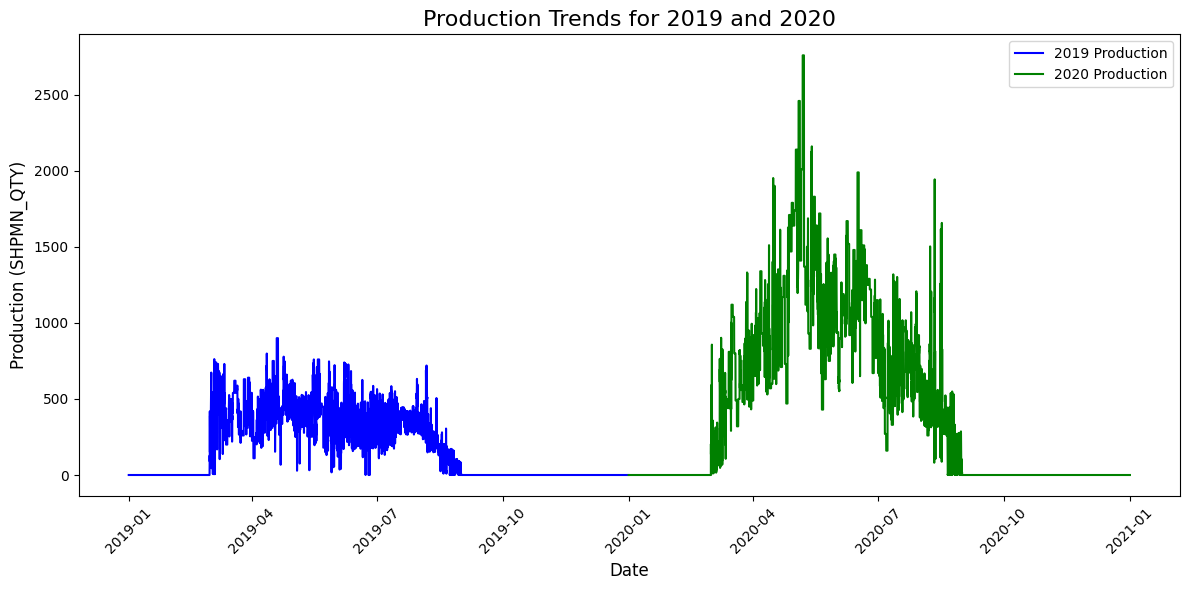

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. MSRM_DT 컬럼을 datetime 타입으로 변환 (필요 시)
data['MSRM_DT'] = pd.to_datetime(data['MSRM_DT'])

# 2. 2019년, 2020년 데이터 필터링
df_2019 = data[data['MSRM_DT'].dt.year == 2019]
df_2020 = data[data['MSRM_DT'].dt.year == 2020]

# 3. 시각화 설정
plt.figure(figsize=(12, 6))

# 4. 2019년 생산량 라인 그래프
plt.plot(df_2019['MSRM_DT'], df_2019['SHPMN_QTY'], label='2019 Production', color='blue')

# 5. 2020년 생산량 라인 그래프
plt.plot(df_2020['MSRM_DT'], df_2020['SHPMN_QTY'], label='2020 Production', color='green')

# 6. 그래프 레이블 및 제목 설정
plt.xlabel('Date', fontsize=12)
plt.ylabel('Production (SHPMN_QTY)', fontsize=12)
plt.title('Production Trends for 2019 and 2020', fontsize=16)
plt.legend()  # 범례 표시

# 7. x축 날짜 포맷 조정 (자동 조정)
plt.xticks(rotation=45)
plt.tight_layout()  # 레이아웃 자동 조정

# 8. 그래프 출력
plt.show()

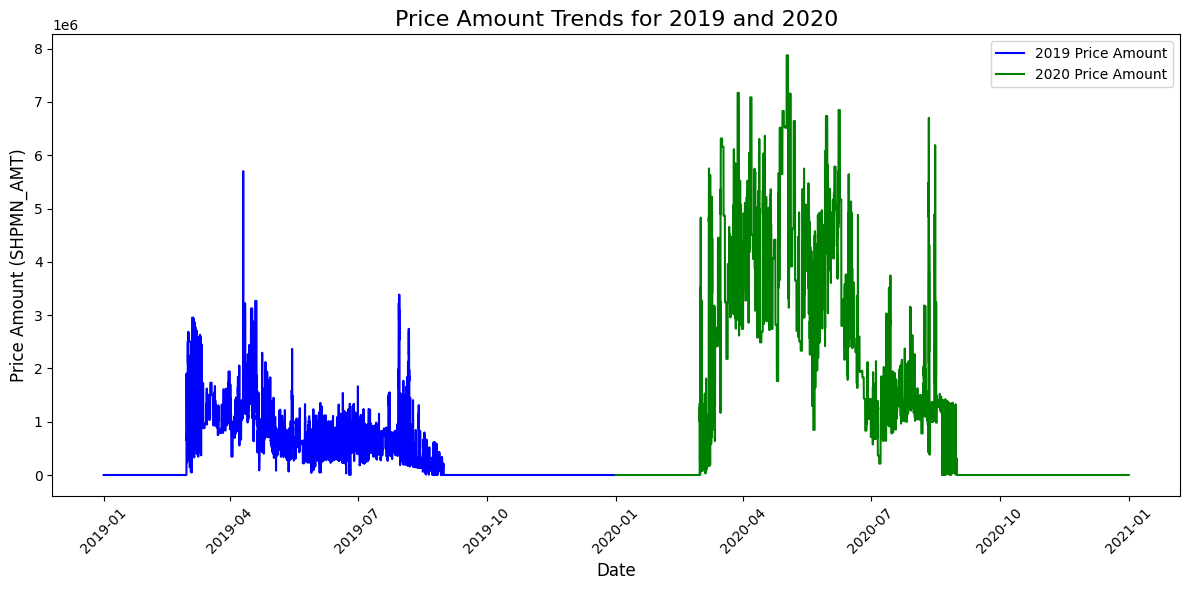

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. MSRM_DT 컬럼을 datetime 타입으로 변환 (필요 시)
data['MSRM_DT'] = pd.to_datetime(data['MSRM_DT'])

# 2. 2019년, 2020년 데이터 필터링
df_2019 = data[data['MSRM_DT'].dt.year == 2019]
df_2020 = data[data['MSRM_DT'].dt.year == 2020]

# 3. 시각화 설정
plt.figure(figsize=(12, 6))

# 4. 2019년 생산량 라인 그래프
plt.plot(df_2019['MSRM_DT'], df_2019['SHPMN_AMT'], label='2019 Price Amount', color='blue')

# 5. 2020년 생산량 라인 그래프
plt.plot(df_2020['MSRM_DT'], df_2020['SHPMN_AMT'], label='2020 Price Amount', color='green')

# 6. 그래프 레이블 및 제목 설정
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price Amount (SHPMN_AMT)', fontsize=12)
plt.title('Price Amount Trends for 2019 and 2020', fontsize=16)
plt.legend()  # 범례 표시

# 7. x축 날짜 포맷 조정 (자동 조정)
plt.xticks(rotation=45)
plt.tight_layout()  # 레이아웃 자동 조정

# 8. 그래프 출력
plt.show()

## RandomizedSearchCV

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# 데이터 불러오기
data = pd.read_csv("final_dataset4.csv")
data['SHPMN_AMT'] = data['SHPMN_AMT']/1000

# 특성과 목표 변수 분리
features = ['AREA_TPRT', 'AREA_HMDT', 'AREA_WDSP', 'INNER_TPRT', 'INNER_HMDT', 'INNER_CBDX_CTRN', 'PLT_LNGTH', 'LEAF_LNGTH', 'LEAF_WDTH', 'STEM_THNS']
targets = ['SHPMN_QTY', 'SHPMN_AMT']

# 결측값이 없는 데이터 필터링
train_data = data.dropna(subset=targets)
X_train = train_data[features]
y_train = train_data[targets]

# 결측값이 있는 행들로 테스트 데이터셋 구성
test_data = data[data[targets[0]].isna() | data[targets[1]].isna()]
X_test = test_data[features]

# RandomizedSearchCV를 위한 파라미터 범위 설정
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# RandomForestRegressor 및 RandomizedSearchCV 설정
model = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(model, param_distributions, n_iter=50, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1, random_state=42)

# RandomizedSearchCV로 최적 파라미터 찾기
random_search.fit(X_train, y_train)

# 최적 파라미터 출력
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

# 최적 파라미터로 모델 재학습
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# 예측 및 결측값 채우기
predictions = best_model.predict(X_test)
data.loc[X_test.index, targets] = predictions

# 모델 성능 평가 (RMSE 계산)
y_pred = best_model.predict(X_train)
rmse = mean_squared_error(y_train, y_pred, squared=False, multioutput='raw_values')
print(f'SHPMN_QTY RMSE: {rmse[0]}')
print(f'SHPMN_AMT RMSE: {rmse[1]}')

data.head()


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
69 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
69 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
Best Score: 3277216.0869023143
SHPMN_QTY RMSE: 101.81571000655386
SHPMN_AMT RMSE: 264.10391779672506


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,MSRM_DT,AREA_TPRT,AREA_HMDT,AREA_WDSP,INNER_TPRT,INNER_HMDT,INNER_CBDX_CTRN,PLT_LNGTH,LEAF_LNGTH,LEAF_WDTH,STEM_THNS,SHPMN_QTY,SHPMN_AMT
0,2019-01-01 00:00:00,-1.9,50.0,1.6,19.1,87.0,840.911874,78.393571,9.645630,9.775290,4.442480,884.213254,3762.956633
1,2019-01-01 01:00:00,-3.2,54.0,1.7,18.8,87.0,856.601990,74.705911,9.683795,9.773381,4.471164,880.090972,3745.086054
2,2019-01-01 02:00:00,-2.5,62.0,2.1,18.5,87.0,871.298626,75.947870,9.664150,9.740255,4.508429,868.426488,3587.925756
3,2019-01-01 03:00:00,-2.5,62.0,1.6,18.1,87.0,878.309889,78.281749,9.635497,9.729305,4.519635,868.392560,3599.187442
4,2019-01-01 04:00:00,-3.6,67.0,0.8,17.8,88.0,893.520363,79.009383,9.601495,9.681717,4.558723,864.798095,3442.182879
